In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

Data Load

In [130]:
df = pd.read_csv("D:\Learning\ML programing projects\Strpke predection-2\Stroke data.csv")
df.head(5)


<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:1: SyntaxWarning: invalid escape sequence '\L'
C:\Users\COMPUTER   ONE\AppData\Local\Temp\ipykernel_18704\2753891154.py:1: SyntaxWarning: invalid escape sequence '\L'
  df = pd.read_csv("D:\Learning\ML programing projects\Strpke predection-2\Stroke data.csv")


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [131]:
print(df.shape)

(5110, 12)


Data Information

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [133]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [134]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [135]:
# we found 204 row null in the bmi so we will replace it with the mean
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df.isnull().sum()


C:\Users\COMPUTER   ONE\AppData\Local\Temp\ipykernel_18704\3408700219.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [136]:
df['bmi']

0       36.6
1       28.1
2       32.5
3       34.4
4       24.0
        ... 
5105    28.1
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [137]:
df.duplicated().sum()

0

Data Visualization

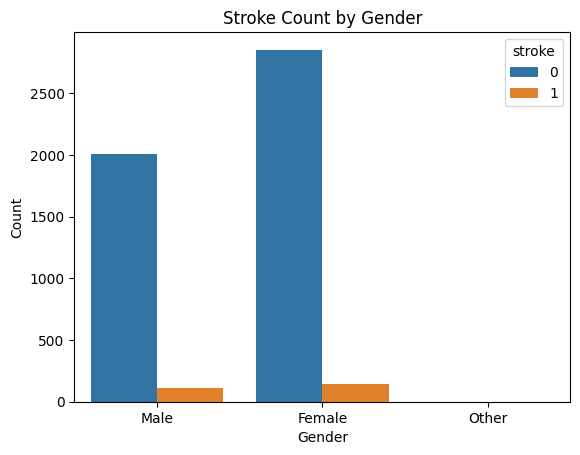

In [138]:
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Stroke Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

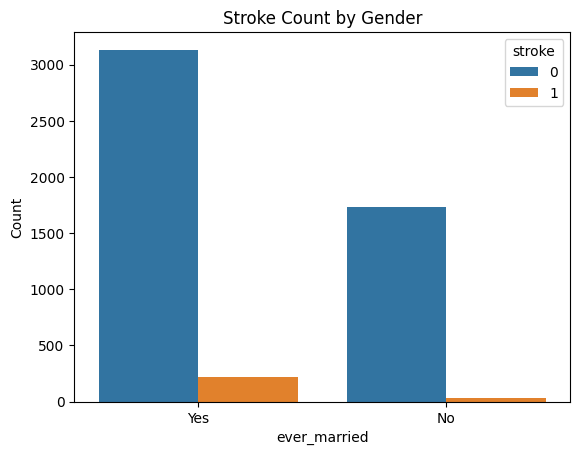

In [139]:
sns.countplot(x='ever_married', hue='stroke', data=df)
plt.title('Stroke Count by Gender')
plt.xlabel('ever_married')
plt.ylabel('Count')
plt.show()

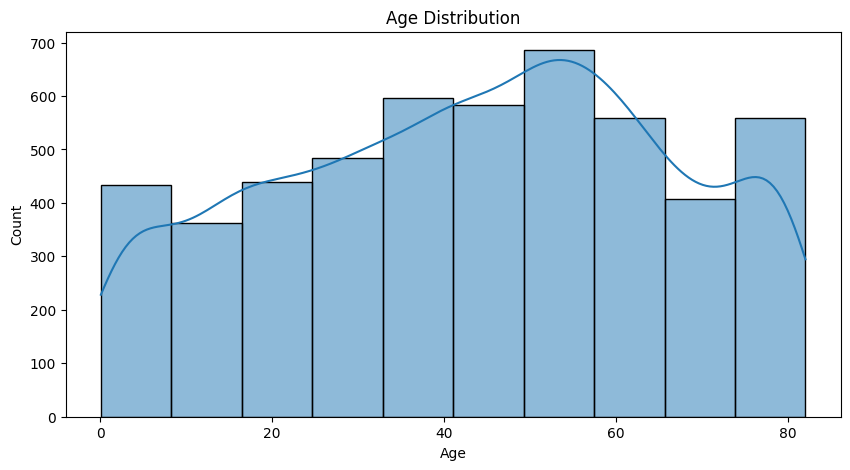

In [140]:
plt.figure(figsize=(10, 5))
sns.histplot(df["age"], bins=10, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

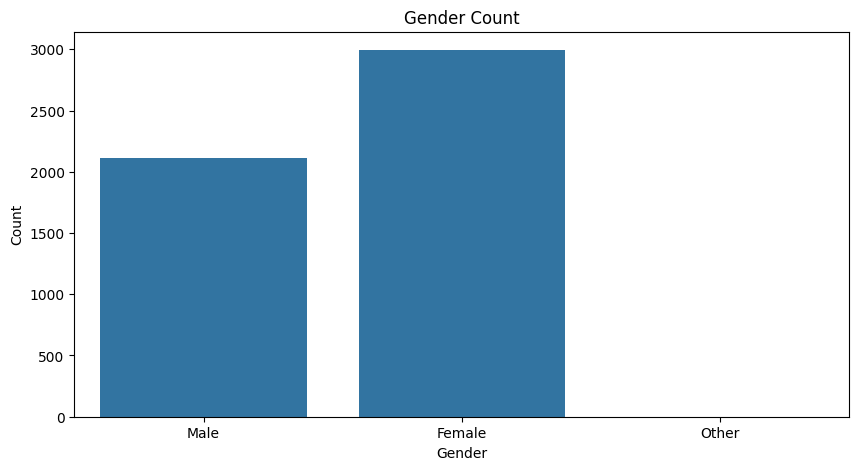

In [141]:
plt.figure(figsize=(10, 5))
sns.countplot(x="gender", data=df)
plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


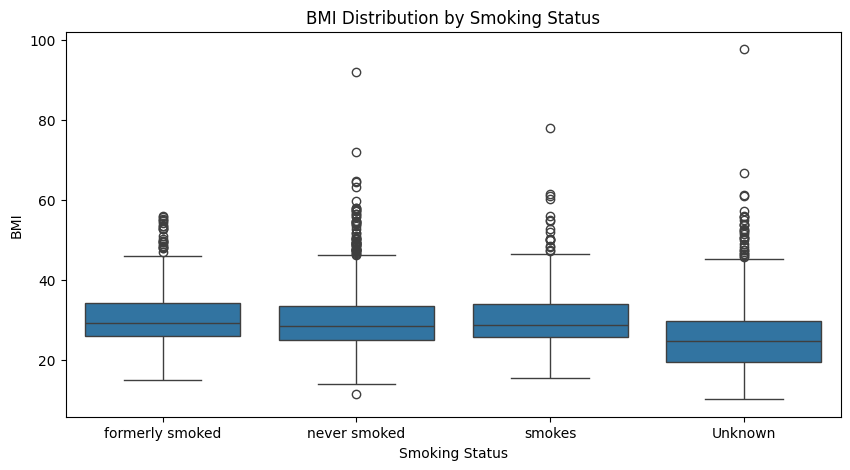

In [142]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="smoking_status", y="bmi", data=df)
plt.title("BMI Distribution by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("BMI")
plt.show()

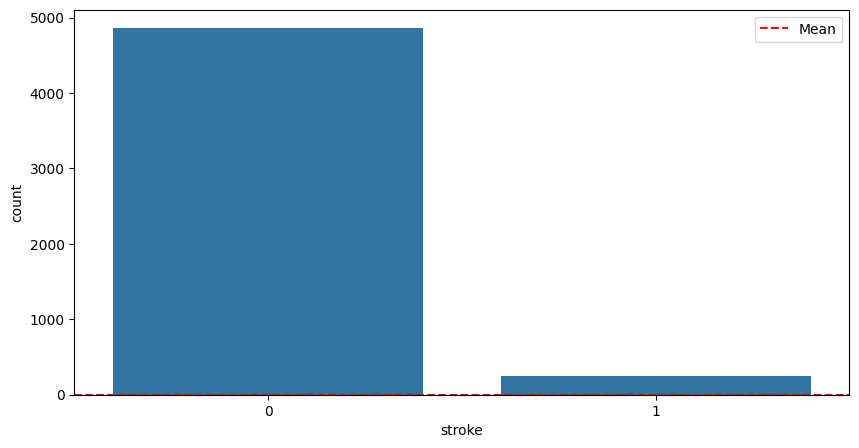

In [143]:
plt.figure(figsize=(10, 5))
sns.countplot(x="stroke",data=df)
mean_stroke = df["stroke"].mean()
plt.axhline(mean_stroke, color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()


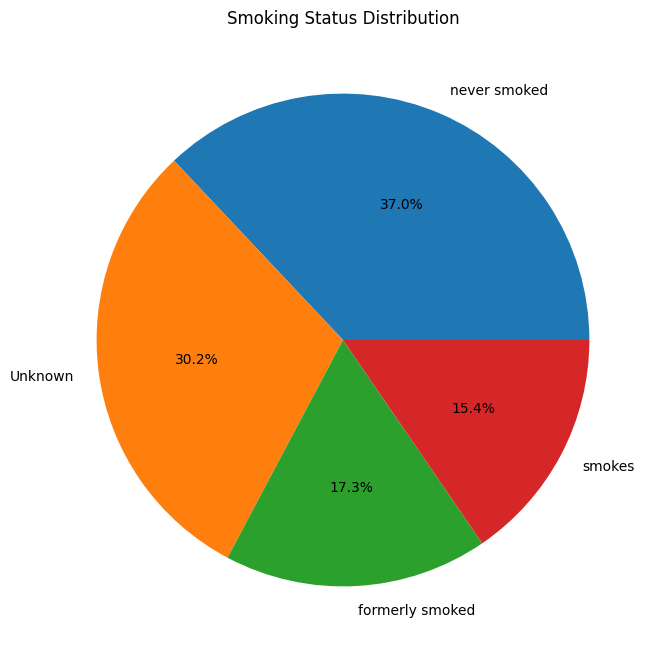

In [144]:
plt.figure(figsize=(8, 8))
df["smoking_status"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Smoking Status Distribution")
plt.ylabel("")
plt.show()

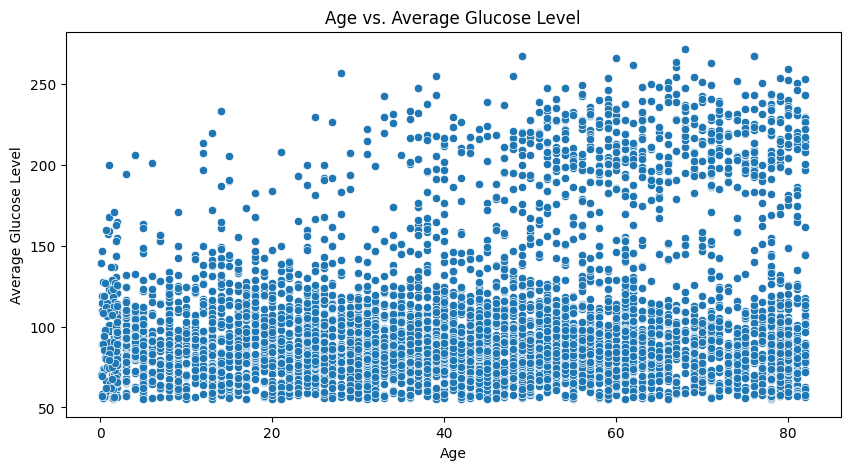

In [145]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="age", y="avg_glucose_level", data=df)
plt.title("Age vs. Average Glucose Level")
plt.xlabel("Age")
plt.ylabel("Average Glucose Level")
plt.show()

# Data Preprocessing

In [146]:
# Apply LabelEncoder to remaining categorical columns
encoding = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = encoding.fit_transform(df[col])

In [147]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
x_train, x_test,y_train,y_test= train_test_split(X,Y, test_size=0.3,random_state=40)
print("x_train =", x_train)
print("x_test =", x_test)


x_train =          id  gender   age  hypertension  heart_disease  ever_married  \
4543  56322       1  49.0             0              1             1   
2649  42412       0  18.0             0              0             0   
4583  37515       0  46.0             0              0             1   
4246  59027       0  12.0             0              0             0   
4757  44655       0  34.0             0              0             1   
...     ...     ...   ...           ...            ...           ...   
3603  28247       1  82.0             0              0             0   
4722  54395       0  78.0             1              0             1   
3340   5655       1   4.0             0              0             0   
3064  56255       0  24.0             0              0             0   
3398  44243       0  29.0             0              0             0   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  
4543          0               0              88.97

Model Traning Decision Tree

In [148]:
model = DecisionTreeClassifier(criterion='gini', max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [149]:
predict =model.predict(x_test)
dt_accuracy_score = accuracy_score(y_test,predict)
print(dt_accuracy_score)

0.9510763209393346


In [150]:
precision_score_dt = precision_score(y_test,predict)
print(precision_score_dt)

0.3


In [151]:
recall_score_dt =recall_score(y_test,predict)
print(recall_score_dt)

0.04225352112676056


In [152]:
confusion_matrix_dt = confusion_matrix(y_test,predict)
print(confusion_matrix_dt)

[[1455    7]
 [  68    3]]


In [153]:
f1_score_dt = f1_score(y_test,predict)
print(f1_score_dt)

0.07407407407407407


SVM Model

In [154]:
model_2 = SVC()
model_2.fit(x_train,y_train)

SVC()

In [155]:
predict_2 =model_2.predict(x_test)

In [156]:
accuracy_score_2 = accuracy_score(y_test,predict_2)
print(accuracy_score_2)

0.9536855838225701


In [157]:
precision_score_2 = precision_score(y_test,predict_2)
print(precision_score_2)

0.0


c:\Users\COMPUTER   ONE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [158]:
recall_score_2 =recall_score(y_test,predict)
print(recall_score_2)

0.04225352112676056


In [159]:
confusion_matrix_2 = confusion_matrix(y_test,predict_2)
print(confusion_matrix_2)

[[1462    0]
 [  71    0]]


In [160]:
f1_score_2 = f1_score(y_test,predict_2)
print(f1_score_2)

0.0
